In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import diagnostic
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.outliers_influence import OLSInfluence

# Toy dataset for ANOVAs and planned comparisons

## Q

Load the `../data/wheat.txt` toy dataset [[1]](https://campus.murraystate.edu/academic/faculty/cmecklin/STA565/wheat.txt) with the adequate separator.

## A

In [4]:
df = pd.read_csv('../data/wheat.txt', sep=' ')
df

,variety,location,yield
0,A,1,35.3
1,A,2,31.0
2,A,3,32.7
3,A,4,36.8
4,A,5,37.2
5,A,6,33.1
6,B,1,33.7
7,B,2,32.2
8,B,3,31.4
9,B,4,32.7


## Q

Perform a one-way ANOVA using a Wilkinson formula to specify a linear model of response variable `yield` with `variety` as independent variable. Print the summary tables and, if necessary, an ANOVA table.

## A

In [5]:
df.rename(columns={'yield': 'Yield'}, inplace=True)

In [6]:
model = smf.ols('Yield ~ C(variety)', df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2.492
Date:                Thu, 17 Oct 2024   Prob (F-statistic):             0.0688
Time:                        15:27:42   Log-Likelihood:                -61.811
No. Observations:                  30   AIC:                             133.6
Df Residuals:                      25   BIC:                             140.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          34.3500      0.849     40.443      0.000      32.601      36.099
C(variety)[T.B]    -1.2333      1.201     -1.027      0.314      -3.707       1.240
C(variety)[T.C]     0.9500      1.201      0.791      0.436      -1.524       3.424
C(variety)[T.D]     1.2667      1.201      1.055      0.302      -1.207       3.740
C(variety)[T.E]    -1.8167      1.201     -1.512      0.143      -4.290       0.657
==============================================================================
Omnibus:                        3.001   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.223   Jarque-Bera (JB):                1.436
Skew:                           0.131   Prob(JB):                        0.488
Kurtosis:                       1.961   Cond. No.                         5.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is no need to print an ANOVA table using `anova_lm`. All the information is already provided by the summary tables.

In [7]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(variety),4.0,43.136667,10.784167,2.491605,0.068841
Residual,25.0,108.205000,4.328200,NaN,NaN


## Q

Perform a two-way ANOVA of `yield` using `variety` and `location` as categorical variables. Can we introduce an interaction term?

## A

In [8]:
model = smf.ols('Yield ~ C(variety) + C(location)', df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     3.340
Date:                Thu, 17 Oct 2024   Prob (F-statistic):             0.0118
Time:                        15:27:44   Log-Likelihood:                -53.081
No. Observations:                  30   AIC:                             126.2
Df Residuals:                      20   BIC:                             140.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           33.4667      1.004     33.338      0.000      31.373      35.561
C(variety)[T.B]     -1.2333      1.004     -1.229      0.233      -3.327       0.861
C(variety)[T.C]      0.9500      1.004      0.946      0.355      -1.144       3.044
C(variety)[T.D]      1.2667      1.004      1.262      0.222      -0.827       3.361
C(variety)[T.E]     -1.8167      1.004     -1.810      0.085      -3.911       0.277
C(location)[T.2]    -0.5800      1.100     -0.527      0.604      -2.874       1.714
C(location)[T.3]    -0.4800      1.100     -0.436      0.667      -2.774       1.814
C(location)[T.4]     1.8200      1.100      1.655      0.114      -0.474       4.114
C(location)[T.5]     2.4200      1.100      2.201      0.040       0.126       4.714
C(location)[T.6]     2.1200      1.100      1.928      0.068      -0.174       4.414
==============================================================================
Omnibus:                        2.453   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.293   Jarque-Bera (JB):                1.509
Skew:                          -0.282   Prob(JB):                        0.470
Kurtosis:                       2.057   Cond. No.                         7.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(variety),4.0,43.136667,10.784167,3.567176,0.023675
C(location),5.0,47.741667,9.548333,3.158388,0.029151
Residual,20.0,60.463333,3.023167,NaN,NaN


In [10]:
sm.stats.anova_lm(model, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,3360.053333,1.0,1111.435029,5.290791e-19
C(variety),43.136667,4.0,3.567176,2.367502e-02
C(location),47.741667,5.0,3.158388,2.915088e-02
Residual,60.463333,20.0,NaN,NaN


## Q

`variety` now appears to have a significant effect. Run pairwise *t* tests to determine which varieties exhibit different yields, with Sidak-Holm correction for multiple comparisons.

## A

In [11]:
model.t_test_pairwise('C(variety)').result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
B-A,-1.233333,1.003854,-1.228599,0.233484,-3.327335,0.860669,0.714116,False
C-A,0.950000,1.003854,0.946353,0.355263,-1.144002,3.044002,0.731992,False
D-A,1.266667,1.003854,1.261804,0.221537,-0.827335,3.360669,0.714116,False
E-A,-1.816667,1.003854,-1.809693,0.085398,-3.910669,0.277335,0.414682,False
C-B,2.183333,1.003854,2.174952,0.041804,0.089331,4.277335,0.258383,False
D-B,2.500000,1.003854,2.490403,0.021673,0.405998,4.594002,0.160786,False
E-B,-0.583333,1.003854,-0.581094,0.567669,-2.677335,1.510669,0.813090,False
D-C,0.316667,1.003854,0.315451,0.755687,-1.777335,2.410669,0.813090,False
E-C,-2.766667,1.003854,-2.756046,0.012183,-4.860669,-0.672665,0.104454,False
E-D,-3.083333,1.003854,-3.071497,0.006021,-5.177335,-0.989331,0.058608,False


We fail to catch significant effects, partly because of the correction for multiple comparisons.

## Q

Fit a mixed-effect linear model treating factor `location` as a random effect.

## A

In [12]:
model = smf.mixedlm('Yield ~ C(variety)', df, groups='location').fit()
model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
==========================================================
Model:              MixedLM  Dependent Variable:  Yield   
No. Observations:   30       Method:              REML    
No. Groups:         6        Scale:               3.0232  
Min. group size:    5        Log-Likelihood:      -56.6568
Max. group size:    5        Converged:           Yes     
Mean group size:    5.0                                   
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept       34.350    0.849 40.444 0.000 32.685 36.015
C(variety)[T.B] -1.233    1.004 -1.229 0.219 -3.201  0.734
C(variety)[T.C]  0.950    1.004  0.946 0.344 -1.018  2.918
C(variety)[T.D]  1.267    1.004  1.262 0.207 -0.701  3.234
C(variety)[T.E] -1.817    1.004 -1.810 0.070 -3.784  0.151
location Var     1.305    0.777                           
==========================================================

"""

## Q

Perform a Wald test to determine whether `variety` also exhibits a significant effect with this model.

## A

In [13]:
model.wald_test('C(variety)[T.B] = C(variety)[T.C] = C(variety)[T.D] = C(variety)[T.E] = 0', scalar=True, use_f=False)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=14.26858622241916, p-value=0.006485383872451716, df_denom=4>

## Q

Perform pairwise Wald tests for each pair of different varieties, and make a dataframe with a `pvalue` column and as many rows (10) as `X-Y` comparisons.

## A

Reminder: comparisons with level `A` are expressed as a slope equal to 0, while comparisons between any other 2 levels are expressed as equal slopes.

In [14]:
model.wald_test('C(variety)[T.B] = 0', scalar=True, use_f=False)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=1.5094424340075572, p-value=0.21922418570860835, df_denom=1>

In [15]:
model.wald_test('C(variety)[T.B] = C(variety)[T.C]', scalar=True, use_f=False)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=4.730376481008711, p-value=0.02963439793410425, df_denom=1>

We also need to look in more details at the structure of the returned results:

In [16]:
results = model.wald_test('C(variety)[T.B] = 0', scalar=True, use_f=False)
results.statistic, results.pvalue

(1.5094424340075572, np.float64(0.21922418570860835))

In [17]:
levels = list('ABCDE')

table = pd.DataFrame()

for level in levels[1:]:
    label = f"A-{level}"
    results = model.wald_test(f"C(variety)[T.{level}] = 0", scalar=True, use_f=False)
    table.loc[label, 'chi2'] = results.statistic
    table.loc[label, 'pvalue'] = results.pvalue

for i, level1 in enumerate(levels[1:-1]):
    for level2 in levels[i+2:]:
        label = f"{level1}-{level2}"
        results = model.wald_test(f"C(variety)[T.{level1}] = C(variety)[T.{level2}]", scalar=True, use_f=False)
        table.loc[label, 'chi2'] = results.statistic
        table.loc[label, 'pvalue'] = results.pvalue

table

,chi2,pvalue
A-B,1.509442,0.219224
A-C,0.895577,0.343971
A-D,1.592137,0.207021
A-E,3.274961,0.070345
B-C,4.730376,0.029634
B-D,6.202055,0.012760
B-E,0.337667,0.561179
C-D,0.099509,0.752420
C-E,7.595726,0.005851
D-E,9.434015,0.002130


## Q

Correct the p-values for multiple comparisons, and add a `corrected pvalue` column to the result dataframe.

In [18]:
_, table['corrected pvalue'], _, _ = multipletests(table['pvalue'])
table

,chi2,pvalue,corrected pvalue
A-B,1.509442,0.219224,0.686449
A-C,0.895577,0.343971,0.717662
A-D,1.592137,0.207021,0.686449
A-E,3.274961,0.070345,0.354447
B-C,4.730376,0.029634,0.189883
B-D,6.202055,0.012760,0.097637
B-E,0.337667,0.561179,0.807436
C-D,0.099509,0.752420,0.807436
C-E,7.595726,0.005851,0.051441
D-E,9.434015,0.002130,0.021097


At least one difference now shows up as significant.

# Generalized linear models

## Q

Load the `../data/titanic_tickets.csv` data file and look at it.

Exclude the null-fare tickets.

## A

In [20]:
df = pd.read_csv('../data/titanic_tickets.csv', index_col=0)
df

,Fare,Pclass,Embarked,Deck,Cabins,Passengers,AdultMales,AdultFemales,Children,SibSp,Parch
110152,86.500,1,S,B,2,3,0,3,0,0,0
110413,79.650,1,S,E,2,3,1,2,0,1,2
110465,52.000,1,S,A,2,2,2,0,0,0,0
110469,26.000,1,S,C,1,1,1,0,0,0,0
110489,26.550,1,S,D,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
W./C. 6608,34.375,3,S,NaN,1,5,2,2,1,2,3
W./C. 6609,7.550,3,S,NaN,1,1,0,1,0,0,0
W.E.P. 5734,61.175,1,S,E,1,2,1,1,0,1,0
W/C 14208,10.500,2,S,NaN,1,1,1,0,0,0,0


In [21]:
df[df['Fare']==0]

,Fare,Pclass,Embarked,Deck,Cabins,Passengers,AdultMales,AdultFemales,Children,SibSp,Parch
112050,0.0,1,S,A,1,1,1,0,0,0,0
112051,0.0,1,S,NaN,1,1,1,0,0,0,0
112052,0.0,1,S,NaN,1,1,1,0,0,0,0
112058,0.0,1,S,B,4,2,2,0,0,0,0
112059,0.0,1,S,B,1,1,1,0,0,0,0
19972,0.0,1,S,NaN,1,1,1,0,0,0,0
239853,0.0,2,S,NaN,1,3,3,0,0,0,0
239854,0.0,2,S,NaN,1,1,1,0,0,0,0
239855,0.0,2,S,NaN,1,1,1,0,0,0,0
239856,0.0,2,S,NaN,1,1,1,0,0,0,0


In [22]:
df = df[df['Fare'] > 0]

##

Meaning of some columns:
* `Pclass`: 1 = first class, 2 = second class, 3 = third class
* `Cabins`: number of cabins the ticket refers to
* `Passengers`: number of passengers registered on the ticket
* `SibSp`: maximum number of siblings or spouse
* `Parch`: maximum number of parents or children
* `Embarked`: C = Cherbourg (2nd port of embarkation), Q = Queenstown (3rd), S = Southampton (1st)
* `Deck`: <img src="../images/titanic_decks.png" style="height:600px" />


## Q

Instead of the classical `Survived` variable, we will try to explain the variations in `Fare`.

Let us first consider the first-class tickets only. In order not to loose many data, replace the missing deck information by an empty string (`''`).

Fit a _standard_ linear model for `Fare` as response variable, using `Embarked`, `Deck`, `Cabins`, `Passengers` and `Children` as independent variables (no interaction), and print the summary tables.

## A

In [23]:
firstclass = df[df['Pclass']==1]
firstclass.loc[firstclass['Deck'].isnull(), 'Deck'] = ''
firstclass

,Fare,Pclass,Embarked,Deck,Cabins,Passengers,AdultMales,AdultFemales,Children,SibSp,Parch
110152,86.5000,1,S,B,2,3,0,3,0,0,0
110413,79.6500,1,S,E,2,3,1,2,0,1,2
110465,52.0000,1,S,A,2,2,2,0,0,0,0
110469,26.0000,1,S,C,1,1,1,0,0,0,0
110489,26.5500,1,S,D,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
PC 17759,63.3583,1,C,D,2,2,1,1,0,0,1
PC 17760,135.6333,1,S,C,2,4,1,3,0,0,0
PC 17761,106.4250,1,C,C,1,3,1,2,0,1,0
W.E.P. 5734,61.1750,1,S,E,1,2,1,1,0,1,0


In [24]:
model = smf.ols('Fare ~ C(Embarked) + C(Deck) + C(Cabins) + Passengers + Children', firstclass).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fare   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     43.65
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           5.51e-47
Time:                        15:28:52   Log-Likelihood:                -861.37
No. Observations:                 182   AIC:                             1751.
Df Residuals:                     168   BIC:                             1796.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -11.6346      6.807     -1.709      0.089     -25.073       1.804
C(Embarked)[T.Q]   -23.9597     29.490     -0.812      0.418     -82.179      34.260
C(Embarked)[T.S]    -3.5748      4.549     -0.786      0.433     -12.555       5.405
C(Deck)[T.A]         4.9509      8.045      0.615      0.539     -10.931      20.833
C(Deck)[T.B]        18.2136      7.233      2.518      0.013       3.934      32.493
C(Deck)[T.C]         0.5132      6.418      0.080      0.936     -12.157      13.184
C(Deck)[T.D]        -4.6450      7.440     -0.624      0.533     -19.333      10.043
C(Deck)[T.E]       -11.8527      8.103     -1.463      0.145     -27.849       4.143
C(Cabins)[T.2]      -0.8461      9.114     -0.093      0.926     -18.839      17.147
C(Cabins)[T.3]     -16.3908     13.354     -1.227      0.221     -42.754       9.972
C(Cabins)[T.4]     107.5908     17.838      6.032      0.000      72.375     142.806
C(Cabins)[T.5]     -36.0599     35.618     -1.012      0.313    -106.377      34.257
Passengers          41.6937      3.585     11.631      0.000      34.617      48.771
Children           -58.0156     12.642     -4.589      0.000     -82.973     -33.059
==============================================================================
Omnibus:                      173.832   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6658.055
Skew:                           3.273   Prob(JB):                         0.00
Kurtosis:                      31.899   Cond. No.                         41.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##

If you used `ols`, you may notice several issues, including the non-normality of the residuals, with high skewness and kurtosis.

If you defined all variables as categorical, you may also be warned about multicollinearity. Let us ignore these warnings for now.

## Q

Print the residuals as a function of the predicted values.

## A

In [25]:
model.fittedvalues

110152         127.239141
110413          97.172862
110465          72.282743
110469          26.997523
110489          21.839335
                  ...    
PC 17759        66.261692
PC 17760       151.232488
PC 17761       113.959732
W.E.P. 5734     56.325306
WE/P 5735       86.391585
Length: 182, dtype: float64

In [26]:
model.resid

110152        -40.739141
110413        -17.522862
110465        -20.282743
110469         -0.997523
110489          4.710665
                 ...    
PC 17759       -2.903392
PC 17760      -15.599188
PC 17761       -7.534732
W.E.P. 5734     4.849694
WE/P 5735     -15.391585
Length: 182, dtype: float64

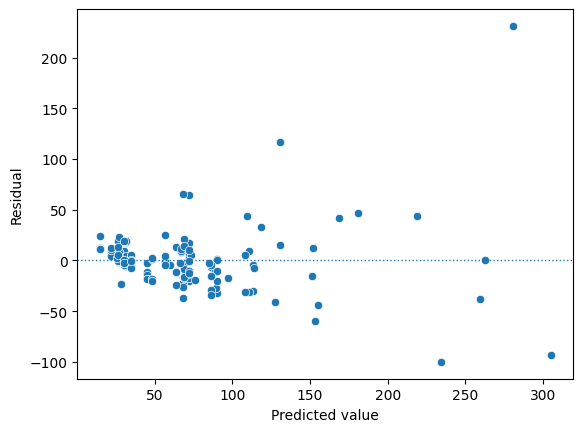

In [27]:
# data to plot
residuals = pd.DataFrame({'Residual': model.resid, 'Predicted value': model.fittedvalues})
# scatter plot
ax = sns.scatterplot(residuals, y='Residual', x='Predicted value')
# zero line
ax.axhline(0, linestyle=':', linewidth=1);

## Q

We have a clear case of heteroscedasticity, as could be expected from some statistics in the summary tables.

Before we move to a generalized linear model, let us try to improve the current model removing outliers.
Plot the Cook's distance for each ticket. Remove the outlier(s) and fit the model again.

## A

/home/bneron/Projects/Cours/scientific_python/sci_py312/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:847: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


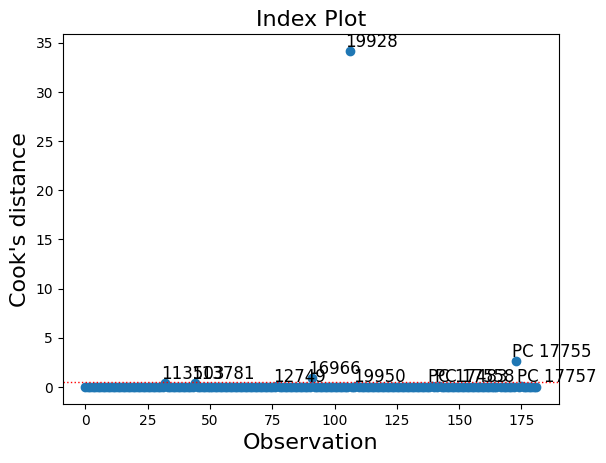

In [28]:
from statsmodels.stats.outliers_influence import OLSInfluence
fig = OLSInfluence(model).plot_index(threshold=0.05)
fig.gca().axhline(0.5, color='r', linestyle=':', linewidth=1);

In [29]:
firstclass_clean = firstclass.drop(labels=['19928', 'PC 17755'])
model = smf.ols('Fare ~ C(Embarked) + C(Deck) + Cabins + Passengers + Children', firstclass_clean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fare   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     94.83
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           1.54e-61
Time:                        15:29:00   Log-Likelihood:                -786.39
No. Observations:                 180   AIC:                             1593.
Df Residuals:                     170   BIC:                             1625.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -10.3426      4.469     -2.314      0.022     -19.164      -1.521
C(Embarked)[T.S]    -3.3575      3.108     -1.080      0.282      -9.492       2.777
C(Deck)[T.A]         3.9948      5.504      0.726      0.469      -6.871      14.860
C(Deck)[T.B]         7.4801      4.939      1.514      0.132      -2.270      17.230
C(Deck)[T.C]         4.4306      4.379      1.012      0.313      -4.213      13.075
C(Deck)[T.D]        -5.0043      5.085     -0.984      0.326     -15.043       5.034
C(Deck)[T.E]        -7.5249      5.559     -1.354      0.178     -18.499       3.449
Cabins              -0.3417      3.554     -0.096      0.924      -7.358       6.674
Passengers          40.8216      2.369     17.229      0.000      36.145      45.499
Children           -40.5959      8.482     -4.786      0.000     -57.339     -23.853
==============================================================================
Omnibus:                      113.844   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1330.344
Skew:                           2.110   Prob(JB):                    1.32e-289
Kurtosis:                      15.632   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Q

Plot the density of `Fare` for first-class passengers and overlay a fitted distribution function from the exponential family. `scipy.stats.invgauss` and `scipy.stats.gamma` may be useful here.

## A

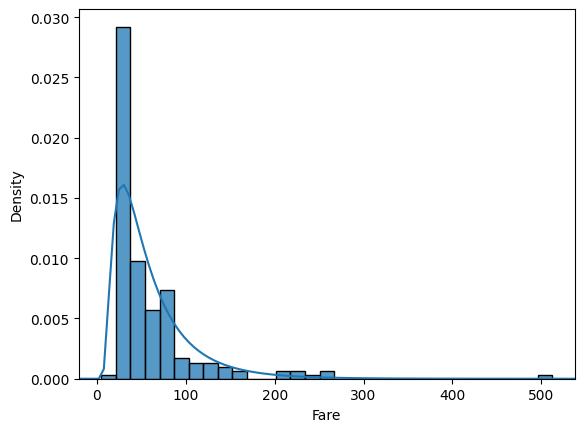

In [30]:
# plot a density histogram
ax = sns.histplot(firstclass, x='Fare', stat='density')
# fit an inverse Gaussian (works better than gamma)
#distrib = stats.gamma
distrib = stats.invgauss
distrib = distrib(*distrib.fit(firstclass['Fare']))
# plot the pdf
xmin, xmax = ax.get_xlim()
xgrid = np.linspace(xmin, xmax, 100)
ax.plot(xgrid, distrib.pdf(xgrid))
ax.set_xlim(xmin, xmax);

## Q

Fit a generalized linear model using an inverse Gaussian distribution of `Fare` using `Embarked`, `Deck`, `Cabins`, `Passengers` and `Children` for the linear predictor.

Compare fares between decks, with corrections for multiple comparisons.

## A

In [31]:
model = smf.glm('Fare ~ C(Embarked) + C(Deck) + Cabins + Passengers + Children', firstclass, family=sm.families.InverseGaussian(sm.families.links.Log())).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Fare   No. Observations:                  182
Model:                            GLM   Df Residuals:                      171
Model Family:         InverseGaussian   Df Model:                           10
Link Function:                    Log   Scale:                       0.0016691
Method:                          IRLS   Log-Likelihood:                -725.75
Date:                Thu, 17 Oct 2024   Deviance:                      0.29921
Time:                        15:29:04   Pearson chi2:                    0.285
No. Iterations:                    34   Pseudo R-squ. (CS):             0.9871
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.9337      0.071     41.130      0.000       2.794       3.074
C(Embarked)[T.Q]    -0.6461      0.397     -1.628      0.104      -1.424       0.132
C(Embarked)[T.S]    -0.1006      0.043     -2.331      0.020      -0.185      -0.016
C(Deck)[T.A]         0.1500      0.069      2.172      0.030       0.015       0.285
C(Deck)[T.B]         0.1134      0.069      1.651      0.099      -0.021       0.248
C(Deck)[T.C]         0.0508      0.057      0.896      0.370      -0.060       0.162
C(Deck)[T.D]        -0.0231      0.066     -0.351      0.726      -0.152       0.106
C(Deck)[T.E]        -0.0561      0.070     -0.800      0.423      -0.194       0.081
Cabins              -0.3206      0.056     -5.727      0.000      -0.430      -0.211
Passengers           0.8273      0.042     19.571      0.000       0.744       0.910
Children            -0.8798      0.209     -4.201      0.000      -1.290      -0.469
====================================================================================
"""

In [32]:
model.t_test_pairwise('C(Deck)').result_frame

,coef,std err,z,P>|z|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
A-,0.149984,0.069067,2.171580,0.029887,0.014616,0.285353,0.346101,False
B-,0.113435,0.068689,1.651437,0.098649,-0.021192,0.248063,0.646053,False
C-,0.050751,0.056667,0.895590,0.370472,-0.060315,0.161817,0.937757,False
D-,-0.023128,0.065929,-0.350801,0.725737,-0.152345,0.106090,0.958609,False
E-,-0.056123,0.070112,-0.800477,0.423435,-0.193539,0.081294,0.937757,False
B-A,-0.036549,0.081565,-0.448094,0.654085,-0.196414,0.123316,0.958609,False
C-A,-0.099234,0.072961,-1.360084,0.173803,-0.242235,0.043768,0.782896,False
D-A,-0.173112,0.081149,-2.133259,0.032903,-0.332162,-0.014063,0.352697,False
E-A,-0.206107,0.085097,-2.422033,0.015434,-0.372894,-0.039321,0.208095,False
C-B,-0.062685,0.070876,-0.884430,0.376464,-0.201599,0.076229,0.937757,False


## Q

Group the decks so that *A*, *B* and *C* are labelled *ABC*, and *D* and *E* are labelled *DE*. Check whether the simplified model unveils any difference of fare between the grouped decks.

## A

In [33]:
deck = firstclass['Deck']
for d in ['A', 'B', 'C']:
    firstclass.loc[deck==d, 'Deck'] = 'ABC'
for d in 'DE':
    firstclass.loc[deck==d, 'Deck'] = 'DE'

In [34]:
model = smf.glm('Fare ~ C(Embarked) + C(Deck) + Cabins + Passengers + Children', firstclass, family=sm.families.InverseGaussian(sm.families.links.Log())).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Fare   No. Observations:                  182
Model:                            GLM   Df Residuals:                      174
Model Family:         InverseGaussian   Df Model:                            7
Link Function:                    Log   Scale:                       0.0016739
Method:                          IRLS   Log-Likelihood:                -726.86
Date:                Thu, 17 Oct 2024   Deviance:                      0.30293
Time:                        15:29:07   Pearson chi2:                    0.291
No. Iterations:                    33   Pseudo R-squ. (CS):             0.9868
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.9418      0.070     42.150      0.000       2.805       3.079
C(Embarked)[T.Q]    -0.6779      0.397     -1.708      0.088      -1.456       0.100
C(Embarked)[T.S]    -0.1094      0.043     -2.565      0.010      -0.193      -0.026
C(Deck)[T.ABC]       0.0954      0.048      1.999      0.046       0.002       0.189
C(Deck)[T.DE]       -0.0357      0.055     -0.646      0.518      -0.144       0.073
Cabins              -0.3121      0.054     -5.732      0.000      -0.419      -0.205
Passengers           0.8175      0.042     19.612      0.000       0.736       0.899
Children            -0.8372      0.210     -3.982      0.000      -1.249      -0.425
====================================================================================
"""

In [35]:
model.t_test_pairwise('C(Deck)').result_frame

,coef,std err,z,P>|z|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
ABC-,0.095376,0.047713,1.998945,0.045614,0.001860,0.188892,0.089148,False
DE-,-0.035664,0.055219,-0.645874,0.518361,-0.143891,0.072563,0.518361,False
DE-ABC,-0.131041,0.050564,-2.591565,0.009554,-0.230145,-0.031936,0.028389,True


## Q

Programmatically search for a model with interaction terms that minimize the AIC.

You may for example look for the best model among those with a single `A * B` interaction term, and then repeat the procedure with the `A * B` term as a replacement for both `A` and `B`.

## A

In [36]:
model_spec = 'Fare ~ C(Embarked) + C(Deck) + Cabins + Passengers + Children'
model_aic = {model_spec: model.aic}

def explore_1level(model_aic, terms):
    for i in range(len(terms)-1):
        for j in range(i+1, len(terms)):
            interaction_term = ' * '.join((terms[i], terms[j]))
            model_terms = ['Fare ~ ' + interaction_term]
            for k in range(len(terms)):
                if k not in (i, j):
                    model_terms.append(terms[k])
            model_spec = ' + '.join(model_terms)
            fitted_model = smf.glm(model_spec, firstclass, family=sm.families.InverseGaussian(sm.families.links.Log())).fit()
            model_aic[model_spec] = fitted_model.aic
    return model_aic

terms = ['C(Embarked)', 'C(Deck)', 'Cabins', 'Passengers', 'Children']
explore_1level(model_aic, terms)

{'Fare ~ C(Embarked) + C(Deck) + Cabins + Passengers + Children': np.float64(1469.7224530524886),
 'Fare ~ C(Embarked) * C(Deck) + Cabins + Passengers + Children': np.float64(1472.8570267766695),
 'Fare ~ C(Embarked) * Cabins + C(Deck) + Passengers + Children': np.float64(1450.589879261779),
 'Fare ~ C(Embarked) * Passengers + C(Deck) + Cabins + Children': np.float64(1466.6673025135624),
 'Fare ~ C(Embarked) * Children + C(Deck) + Cabins + Passengers': np.float64(1471.730470133521),
 'Fare ~ C(Deck) * Cabins + C(Embarked) + Passengers + Children': np.float64(1471.7331282583878),
 'Fare ~ C(Deck) * Passengers + C(Embarked) + Cabins + Children': np.float64(1472.4105103002057),
 'Fare ~ C(Deck) * Children + C(Embarked) + Cabins + Passengers': np.float64(1471.7304701335213),
 'Fare ~ Cabins * Passengers + C(Embarked) + C(Deck) + Children': np.float64(1442.7498384491114),
 'Fare ~ Cabins * Children + C(Embarked) + C(Deck) + Passengers': np.float64(1471.6186668619553),
 'Fare ~ Passengers * 

In [37]:
terms = ['C(Embarked)', 'C(Deck)', 'Cabins * Passengers', 'Children']
explore_1level({}, terms)

{'Fare ~ C(Embarked) * C(Deck) + Cabins * Passengers + Children': np.float64(1446.2029740506312),
 'Fare ~ C(Embarked) * Cabins * Passengers + C(Deck) + Children': np.float64(1399.9999464641296),
 'Fare ~ C(Embarked) * Children + C(Deck) + Cabins * Passengers': np.float64(1440.048662430043),
 'Fare ~ C(Deck) * Cabins * Passengers + C(Embarked) + Children': np.float64(1432.100822258053),
 'Fare ~ C(Deck) * Children + C(Embarked) + Cabins * Passengers': np.float64(1440.0486624300434),
 'Fare ~ Cabins * Passengers * Children + C(Embarked) + C(Deck)': np.float64(1437.8075309435867)}

In [38]:
terms = ['C(Embarked) * Cabins * Passengers', 'C(Deck)', 'Children']
explore_1level({}, terms)

{'Fare ~ C(Embarked) * Cabins * Passengers * C(Deck) + Children': np.float64(1416.4827989799123),
 'Fare ~ C(Embarked) * Cabins * Passengers * Children + C(Deck)': np.float64(1403.1712552041522),
 'Fare ~ C(Deck) * Children + C(Embarked) * Cabins * Passengers': np.float64(1402.1020940398741)}

## Q

Draw a [stripplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html) of the AIC for the various models explored.

Example:

<img src="../images/stripplot.png" />

## A

In [39]:
model_spec = 'Fare ~ C(Embarked) + C(Deck) + Cabins + Passengers + Children'
model_aic = {model_spec: model.aic}

terms = ['C(Embarked)', 'C(Deck)', 'Cabins', 'Passengers', 'Children']
explore_1level(model_aic, terms)
terms = ['C(Embarked)', 'C(Deck)', 'Cabins * Passengers', 'Children']
explore_1level(model_aic, terms)
terms = ['C(Embarked) * Cabins * Passengers', 'C(Deck)', 'Children']
explore_1level(model_aic, terms)

{'Fare ~ C(Embarked) + C(Deck) + Cabins + Passengers + Children': np.float64(1469.7224530524886),
 'Fare ~ C(Embarked) * C(Deck) + Cabins + Passengers + Children': np.float64(1472.8570267766695),
 'Fare ~ C(Embarked) * Cabins + C(Deck) + Passengers + Children': np.float64(1450.589879261779),
 'Fare ~ C(Embarked) * Passengers + C(Deck) + Cabins + Children': np.float64(1466.6673025135624),
 'Fare ~ C(Embarked) * Children + C(Deck) + Cabins + Passengers': np.float64(1471.730470133521),
 'Fare ~ C(Deck) * Cabins + C(Embarked) + Passengers + Children': np.float64(1471.7331282583878),
 'Fare ~ C(Deck) * Passengers + C(Embarked) + Cabins + Children': np.float64(1472.4105103002057),
 'Fare ~ C(Deck) * Children + C(Embarked) + Cabins + Passengers': np.float64(1471.7304701335213),
 'Fare ~ Cabins * Passengers + C(Embarked) + C(Deck) + Children': np.float64(1442.7498384491114),
 'Fare ~ Cabins * Children + C(Embarked) + C(Deck) + Passengers': np.float64(1471.6186668619553),
 'Fare ~ Passengers * 

In [40]:
model_aic = pd.DataFrame(model_aic.items(), columns=['models', 'AIC'])
model_aic

,models,AIC
0,Fare ~ C(Embarked) + C(Deck) + Cabins + Passen...,1469.722453
1,Fare ~ C(Embarked) * C(Deck) + Cabins + Passen...,1472.857027
2,Fare ~ C(Embarked) * Cabins + C(Deck) + Passen...,1450.589879
3,Fare ~ C(Embarked) * Passengers + C(Deck) + Ca...,1466.667303
4,Fare ~ C(Embarked) * Children + C(Deck) + Cabi...,1471.730470
5,Fare ~ C(Deck) * Cabins + C(Embarked) + Passen...,1471.733128
6,Fare ~ C(Deck) * Passengers + C(Embarked) + Ca...,1472.410510
7,Fare ~ C(Deck) * Children + C(Embarked) + Cabi...,1471.730470
8,Fare ~ Cabins * Passengers + C(Embarked) + C(D...,1442.749838
9,Fare ~ Cabins * Children + C(Embarked) + C(Dec...,1471.618667


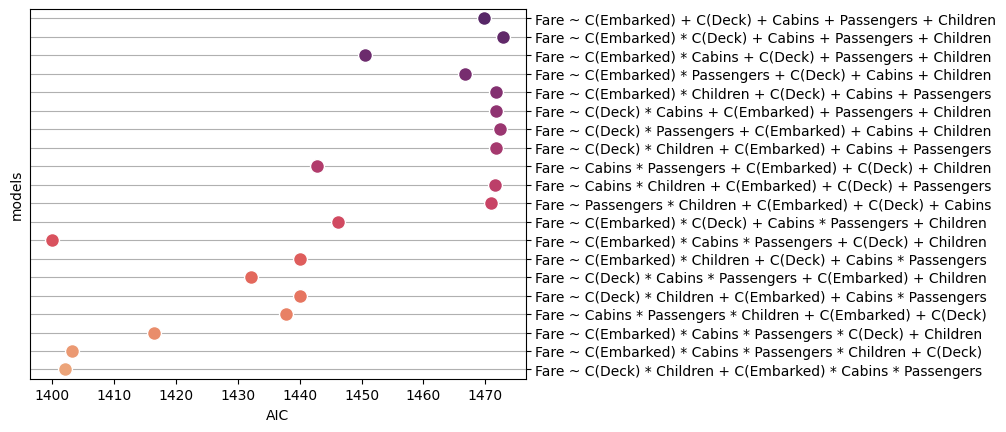

In [41]:
ax = sns.stripplot(y='models', x='AIC', data=model_aic, size=10, orient="h", jitter=False, palette="flare_r", hue='models', linewidth=1, edgecolor="w", legend=False)
ax.yaxis.grid(True)
ax.yaxis.set_ticks_position('right');